<a id='seccion-index'></a>
<style>
html {font-family: Tahoma;}
</style>
<span style="font-size:30px;">Predicción de Salario
</span><br><br>
<span style="font-size:12px;font-family:Tahoma;color:#555;">
<b>Project info:</b><br>
<td width="50%"><table align="left">
    <tr><td><table align="left">
    <tr><td>Autor:</td><td style="text-align:left;color:#12408D;">Carlos Balcazar / Johanna Bastidas / Josef Rodriguez</td></tr>
    <tr><td>Last update:</td><td style="text-align:left">15-07-2023 04:00</td></tr>
    <tr><td>Dataset:</td><td style="text-align:left">
        <ul>
            <li>salary.csv</li>
        </ul>
    <tr><td>Description:</td><td style="text-align:left">Extracción fue realizada por Barry Becker de la base de datos del censo de 1994.<br/>32,561 Observaciones, 15 Atributos.</td></tr>
    <tr><td>Content:</td><td style="text-align:left">
        <ul>
            <li><a href="#seccion-0">Configuración primaria.</a></li>
            <li><a href="#seccion-1">Análisis Exploratorio de Datos (EDA).</a></li>
            <li><a href="#seccion-2">Pre-procesamiento de datos.</a></li>
            <li><a href="#seccion-3">División de datos.</a></li>
            <li><a href="#seccion-4">Selección del Algoritmo.</a></li>
            <li><a href="#seccion-5">Entrenamiento del Modelo.</a></li>
            <li><a href="#seccion-6">Evaluación del Modelo.</a></li>
        </ul>
            </td></tr>
    <tr><td> Module versions:</td><td style="text-align:left">
            + python       : 3.11.1<br>
            + pandas       : 1.4.2<br>
            + seaborn      : 0.11.2<br>
            + sklearn      : 1.0.2</td></tr>    
    <tr><td>Running on:</td><td style="text-align:left">Google Cloud Platform - Dataproc<br/>n1-standard-2 (2 vCPU, 7.5 GB memory)</td></tr>       
 </table></td><td><img src="prediccion-de-salario.jpg" /></td></tr>
</table>
</span> 

<a id='seccion-0'></a>
<div style="background:#04AA6D;color:#FFF;padding:10px;font-size:18px;font-weight:bold;">CONFIGURACIÓN PRIMARIA</div>
<a href="#seccion-index">Ir al inicio</a>

In [1]:
# Importarmos librerias
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Definiendo el Workspace 
thisFilePath = os.getcwd()
os.chdir(thisFilePath)

In [3]:
# Cargando el Dataset
filename = 'salary.csv'
url = os.getcwd() + '\\' + filename
df = pd.read_csv(url)

<a id='seccion-1'></a>
<div style="background:#04AA6D;color:#FFF;padding:10px;font-size:18px;font-weight:bold;">ANÁLISIS EXPLORATORIO DE DATOS (EDA)</div>
<a href="#seccion-index">Ir al inicio</a>

In [4]:
# Mostrar las primeras filas
print(df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50

In [5]:
# Verificar los tipos de datos de cada columna
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object


In [6]:
# Obtener información general
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(32561, 15)

In [7]:
# Estadísticas descriptivas de las variables numéricas
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [8]:
# Contar los valores únicos en cada columna
print(df.nunique())

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64


In [9]:
# Contar los valores únicos en la columna 'salary'
print(df['salary'].value_counts())

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64


C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


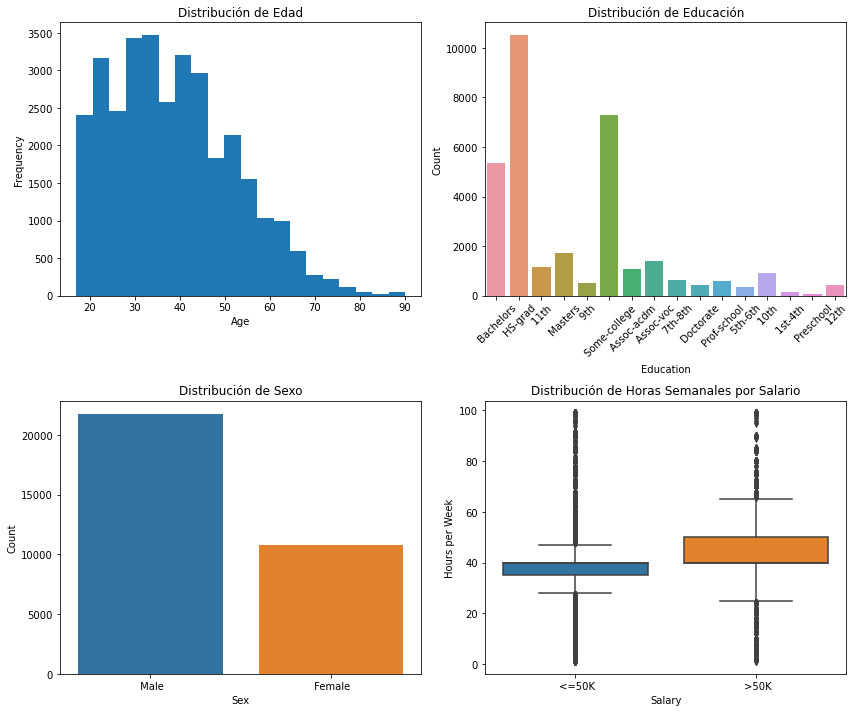

In [10]:
# Crear una figura y ejes para la tabla de gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Histograma de la columna 'age'
axes[0, 0].hist(df['age'], bins=20)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribución de Edad')

# Gráfico 2: Gráfico de barras de la columna 'education'
sns.countplot(df['education'], ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribución de Educación')

# Gráfico 3: Gráfico de barras de la columna 'sex'
sns.countplot(df['sex'], ax=axes[1, 0])
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribución de Sexo')

# Gráfico 4: Gráfico de caja de la columna 'hours-per-week' agrupado por 'salary'
sns.boxplot(x='salary', y='hours-per-week', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel('Salary')
axes[1, 1].set_ylabel('Hours per Week')
axes[1, 1].set_title('Distribución de Horas Semanales por Salario')

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Mostrar la tabla de gráficos
plt.show()

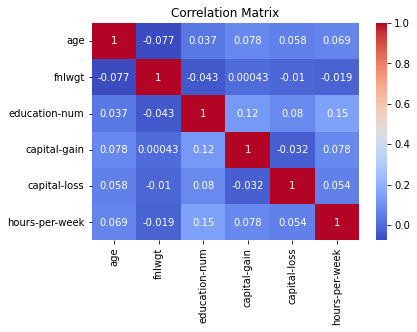

In [11]:
# Matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<a id='seccion-2'></a>
<div style="background:#04AA6D;color:#FFF;padding:10px;font-size:18px;font-weight:bold;">PRE PROCESAMIENTO DE DATOS</div>
<a href="#seccion-index">Ir al inicio</a>

In [12]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop('salary', axis=1)
y = df['salary']

# Codificar variables categóricas
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']  
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])
    
# Manejar los valores faltantes
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Escalar características numéricas
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])    

<a id='seccion-3'></a>
<div style="background:#04AA6D;color:#FFF;padding:10px;font-size:18px;font-weight:bold;">DIVISIÓN DE DATOS</div>
<a href="#seccion-index">Ir al inicio</a>

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir información sobre los conjuntos de datos resultantes
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (26048, 14)
Dimensiones de X_test: (6513, 14)
Dimensiones de y_train: (26048,)
Dimensiones de y_test: (6513,)


<a id='seccion-4'></a>
<div style="background:#04AA6D;color:#FFF;padding:10px;font-size:18px;font-weight:bold;">SELECCIÓN DEL ALGORITMO</div>
<a href="#seccion-index">Ir al inicio</a>

<img src="random-forest.png" />
Como el conjunto de datos tiene características categóricas y numéricas, 
se ha considerado usar el algoritmo de Bosques Aleatorios (Random Forest). 
Este algoritmo es robusto, eficiente y maneja bien tanto las características categóricas como las numéricas. 
También pueden manejar datos desbalanceados y son menos propensos al sobreajuste 
en comparación con otros algoritmos de clasificación.

<a id='seccion-5'></a>
<div style="background:#04AA6D;color:#FFF;padding:10px;font-size:18px;font-weight:bold;">ENTRENAMIENTO DEL MODELO</div>
<a href="#seccion-index">Ir al inicio</a>

In [14]:
# Crear y entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<a id='seccion-6'></a>
<div style="background:#04AA6D;color:#FFF;padding:10px;font-size:18px;font-weight:bold;">EVALUACIÓN DEL MODELO</div>
<a href="#seccion-index">Ir al inicio</a>

In [15]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 86.23%


El modelo alcanzó una precisión del 86.23%, lo cual indica que es capaz de realizar predicciones correctas en la mayoría de los casos. Esto significa que el modelo aprendió patrones importantes en los datos y puede ser útil en aplicaciones prácticas que requieren clasificación. Aunque tiene margen para mejorar, supera el azar y puede ayudar en la toma de decisiones.